# <center>L2 Computational Physics</center>
---

## Random Walks

This assignment will look at some properties of random walks.

In [2]:
import numpy
from matplotlib import pyplot as plt 

To do our work we will implement a walker class. When initialised a list of possible steps is populated. In one dimension it is

[+s] , [-s] 

where s is the step size, it defaults to 1 but can be set as an argument in the constructor. In two dimensions the steps list contains

[ +s , 0 ] , [ -s , 0 ] ,  [ 0 , +s ] , [ 0 , -s ]

At each step the current position of the walker, saved in `self.pos`, is updated by adding one of the possible steps. The function `pickStep` chooses randomly one of the possible steps. Use this function to implement the `doSteps` function that performs `n` steps and returns a `(n+1) x ndim` array representing the trajectory of the walker, including the starting point. 

In [3]:

class walker:
    def __init__(self,x0,ndim=1, step_size=1.0):
        self.pos=x0
        self.ndim=ndim
        self.possibleSteps=[]
        for i in range(ndim):
            step=numpy.zeros(ndim)
            step[i]= - step_size
            self.possibleSteps.append(numpy.array(step,dtype='f'))
            step[i]= + step_size
            self.possibleSteps.append(step.copy())
        self.npossible=len(self.possibleSteps)

    def pickStep(self):
        istep = numpy.random.choice(range(self.npossible))
        return self.possibleSteps[istep]
        
    def doSteps(self,n):
        positions=numpy.ndarray((n+1,self.ndim),dtype='f')
        # YOUR CODE HERE
        positions[0,:]=self.pos
        old_pos=self.pos
        for i in range(0,n):
            new_pos=old_pos+self.pickStep()
            positions[i+1,:]=new_pos
            old_pos=new_pos
        return positions

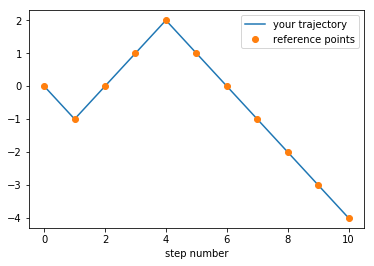

In [4]:
# this test is worth 2 marks
numpy.random.seed(1111)
w = walker(numpy.zeros(1))
pos_test = w.doSteps(10)
reference = [[ 0.], [-1.], [ 0.], [ 1.], [ 2.], [ 1.], [ 0.], [-1.], [-2.], [-3.], [-4.]]
assert len(pos_test)==11
# plots to help debugging
plt.plot(range(11),pos_test, label='your trajectory')
plt.plot(range(11),reference,'o', label='reference points')
plt.legend()
plt.xlabel('step number')
assert (pos_test == reference).all()

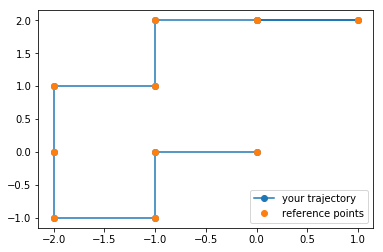

In [5]:
# this test is worth 5 marks
numpy.random.seed(1112)
w = walker(numpy.zeros(2), ndim=2)
pos_test = w.doSteps(10)
reference = numpy.array([[ 0.,  0.], [-1.,  0.], [-1., -1.], [-2., -1.], 
             [-2.,  0.], [-2.,  1.], [-1.,  1.], [-1.,  2.], 
             [ 0.,  2.], [ 1.,  2.], [ 0.,  2.]])
assert pos_test.shape == (11,2)
# plots to help debugging
plt.plot(pos_test[:,0], pos_test[:,1],'-o', label='your trajectory')
plt.plot(reference[:,0],reference[:,1],'o', label='reference points')
plt.legend()
assert (pos_test == reference).all()

This is a plot to visualise trajectories. Use it to convince yourself that you get different trajectories.

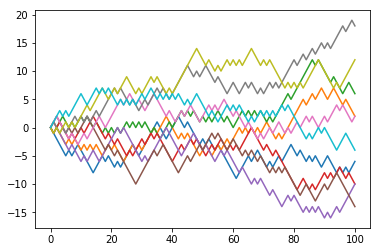

In [6]:
nsteps = 100
for i in range(10):
    w = walker(numpy.zeros(1))
    ys = w.doSteps(nsteps)
    plt.plot(range(nsteps+1),ys)

**Task 1**

Make a plot of average position and average squared position of 100 1D walkers using 1000 steps. Your plot needs a legend, title and labels. [5 marks]


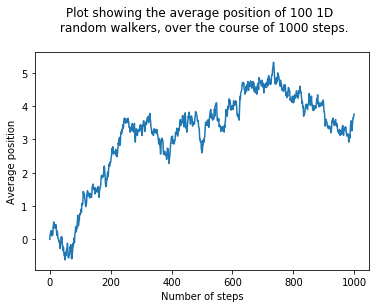

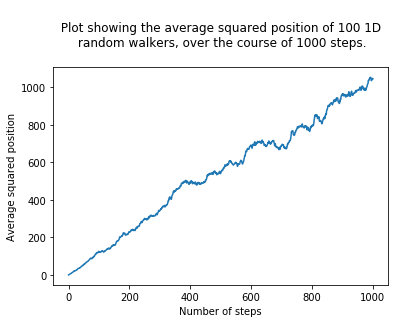

In [7]:
nsteps = 1000
ndim = 1
nwalkers = 100

numpy.random.seed(1111)

all_traj=[] # each row for a different walker

for i in range(0,nwalkers):
    w = walker(numpy.zeros(1),ndim=ndim)
    pos = w.doSteps(nsteps)
    all_traj.append(pos)
    
av_pos=numpy.empty(nsteps+1)
av_sq_pos=numpy.empty(nsteps+1)

for step in range(0,nsteps+1):
    tot_pos_step=0
    tot_sq_pos_step=0
    for walker in all_traj:
        tot_pos_step+=(walker[step])
        tot_sq_pos_step+=(walker[step]**2)
    av_pos[step]=tot_pos_step/nwalkers
    av_sq_pos[step]=tot_sq_pos_step/nwalkers

    ######### GRAPHS #################   

plt.figure(1)
    
plt.plot(av_pos)
plt.title('Plot showing the average position of 100 1D \n random walkers, over the course of 1000 steps.\n')
plt.xlabel('Number of steps')
plt.ylabel('Average position')

plt.figure(2)


plt.title('\n Plot showing the average squared position of 100 1D \n random walkers, over the course of 1000 steps.\n')
plt.xlabel('Number of steps')
plt.ylabel('Average squared position')

plt.plot(av_sq_pos)

**Task 2**

Make a plot to show that the average squared distance scaling is independent of the dimension in which the walker moves. Use 100 steps and 400 walkers and use $D=1,2,3,4$. The plot should have a title, legend and labels. [5 marks]


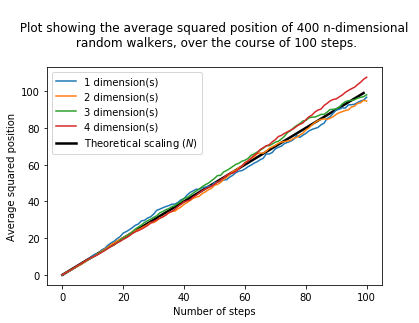

In [8]:
nsteps = 100
nwalkers = 400
dimensions = [1,2,3,4]
numpy.random.seed(1111)

class walker:
    def __init__(self,x0,ndim=1, step_size=1.0):
        self.pos=x0
        self.ndim=ndim
        self.possibleSteps=[]
        for i in range(ndim):
            step=numpy.zeros(ndim)
            step[i]= - step_size
            self.possibleSteps.append(numpy.array(step,dtype='f'))
            step[i]= + step_size
            self.possibleSteps.append(step.copy())
        self.npossible=len(self.possibleSteps)

    def pickStep(self):
        istep = numpy.random.choice(range(self.npossible))
        return self.possibleSteps[istep]
        
    def doSteps(self,n):
        positions=numpy.ndarray((n+1,self.ndim),dtype='f')
        # YOUR CODE HERE
        positions[0,:]=self.pos
        old_pos=self.pos
        for i in range(0,n):
            new_pos=old_pos+self.pickStep()
            positions[i+1,:]=new_pos
            old_pos=new_pos
        return positions

def squared_dist(dim,point):
    result=0
    for i in range(0,dim):
        result+=(point[i]**2)
    return result

for dim in dimensions:
    all_traj=[] # each row for a different walker

    class walker:
        def __init__(self,x0,ndim=1, step_size=1.0):
            self.pos=x0
            self.ndim=ndim
            self.possibleSteps=[]
            for i in range(ndim):
                step=numpy.zeros(ndim)
                step[i]= - step_size
                self.possibleSteps.append(numpy.array(step,dtype='f'))
                step[i]= + step_size
                self.possibleSteps.append(step.copy())
            self.npossible=len(self.possibleSteps)

        def pickStep(self):
            istep = numpy.random.choice(range(self.npossible))
            return self.possibleSteps[istep]

        def doSteps(self,n):
            positions=numpy.ndarray((n+1,self.ndim),dtype='f')
            # YOUR CODE HERE
            positions[0,:]=self.pos
            old_pos=self.pos
            for i in range(0,n):
                new_pos=old_pos+self.pickStep()
                positions[i+1,:]=new_pos
                old_pos=new_pos
            return positions
    
    for o in range(0,nwalkers):
        first=numpy.zeros(dim)
        w = walker(first,ndim=dim)
        pos = w.doSteps(nsteps)
        all_traj.append(pos)

    av_sq_pos=numpy.empty(nsteps+1)

    for step in range(0,nsteps+1):
        tot_sq_pos_step=0
        for walker in all_traj:
            tot_sq_pos_step+=squared_dist(dim,walker[step])
        av_sq_pos[step]=tot_sq_pos_step/nwalkers

        ######### GRAPHS #################   

    plt.title('\n Plot showing the average squared position of 400 n-dimensional \n random walkers, over the course of 100 steps.\n')
    plt.xlabel('Number of steps')
    plt.ylabel('Average squared position')

    plt.plot(av_sq_pos,label='{0} dimension(s)'.format(dim))
    

plt.plot(numpy.arange(nsteps),color='k',linewidth=2.5,zorder=0,label=r'Theoretical scaling ($N$)')
    
plt.legend(loc='upper left')

It can be seen from the above graph that, for all dimensions, the average squared position of a random walker scales as $N$, where $N$ is the number of steps taken.

## 2D walkers

Use 1000 walkers randomly distributed in the unit square (the positions are given in the array `rand_pos`) simulate the diffusion of particles with step size 0.05. Make a plot of the position of the walkers after 10, 100 and 500 steps. The plots should have labels and titles.

Tip: Use `plt.scatter` and consider using its `alpha` option to make you plot look nicer. [6 marks]


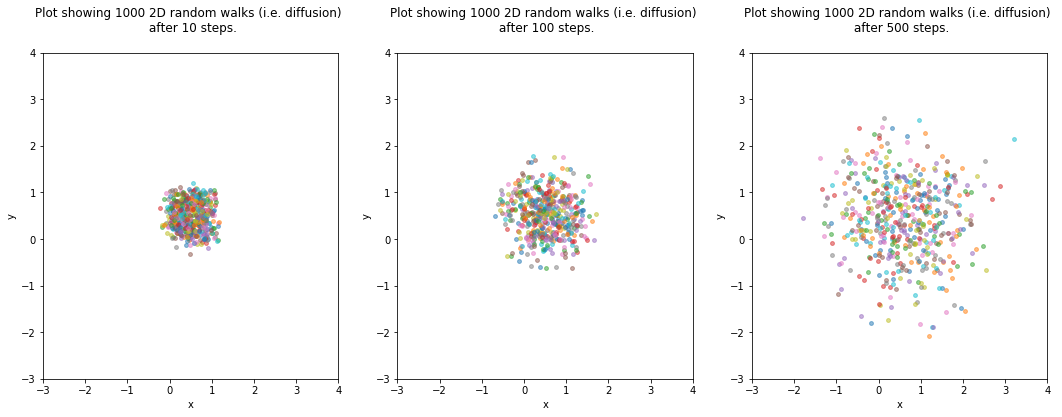

In [22]:
ndim=2
nwalkers=500
numpy.random.seed(1111)

rand_pos = numpy.random.uniform(size=(nwalkers, ndim))

# this code is a template to create 3 subplots in one, adapt it to your task!
plt.figure(figsize=(18,6))
for i, nsteps in enumerate([10,100,500]):
    plt.subplot(131+i)
    plt.xlim((-3, 4))
    plt.ylim((-3, 4))
    plt.title("Plot showing 1000 2D random walks (i.e. diffusion) \n after {} steps.\n ".format(nsteps))
    plt.xlabel('x')
    plt.ylabel('y')
    #plt.scatter(rand_pos[:,0], rand_pos[:,1], alpha=0.1)
    for walkeri in range(0,nwalkers):
        class walker:
            def __init__(self,x0,ndim=1, step_size=1.0):
                self.pos=x0
                self.ndim=ndim
                self.possibleSteps=[]
                for i in range(ndim):
                    step=numpy.zeros(ndim)
                    step[i]= - step_size
                    self.possibleSteps.append(numpy.array(step,dtype='f'))
                    step[i]= + step_size
                    self.possibleSteps.append(step.copy())
                self.npossible=len(self.possibleSteps)

            def pickStep(self):
                istep = numpy.random.choice(range(self.npossible))
                return self.possibleSteps[istep]

            def doSteps(self,n):
                positions=numpy.ndarray((n+1,self.ndim),dtype='f')
                # YOUR CODE HERE
                positions[0,:]=self.pos
                old_pos=self.pos
                for i in range(0,n):
                    new_pos=old_pos+self.pickStep()
                    positions[i+1,:]=new_pos
                    old_pos=new_pos
                return positions
        w = walker(rand_pos[walkeri,:],ndim=ndim,step_size=0.05)
        pos = w.doSteps(nsteps)
        plt.scatter(pos[-1,0],pos[-1,1],alpha=0.5,s=15)